In [1]:
# Modules classiques
import numpy as np
import pandas as pd

# Modules pour data-viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Options
pd.set_option("display.min_rows", 10)
pd.set_option("display.max_columns", 30)
pd.set_option("max_colwidth", 1000)

sns.set_style('darkgrid')
plt.rc('figure',figsize=(17,13))

# EDA
from wordcloud import *

# Preprocessing 
import re, string
from emoji import demojize

# Modélisation
from sklearn.feature_extraction.text import CountVectorizer

# Autres
from IPython.display import display
from PIL import Image

# Serialization
import pickle

# Distance text
from Levenshtein import distance

# Wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator, get_single_color_func
import cv2
from nltk.stem import WordNetLemmatizer

# Lemmatizer
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger
from spacy.language import Language


from IPython.display import display
import random
import dataframe_image as dfi 

%reload_ext autoreload
%autoreload 2

In [2]:
from utils import *

# Calcul du score de popularité en fonction des mentions et des réactions

In [3]:
def gen_simple_fame_by_ep(nom, num_ep):
    '''
    Charge un dataset d'un candidat à un épisode donné et retourne les infos nécessaires pour le calcul du score
    '''
    path_to_load = f'./data_jugement/em{num_ep}/'
    
    def simple_fame(df, nom_candidats):    
        data = {
            'nb_tweets':df.shape[0],
            'nb_likes':df.likeCount.sum(),
            'nb_retweets':df.retweetCount.sum(),
    #         'nb_not_reply':df.isReply.sum(),
    #         'nb_image':df.urlImg.count()
        }

        return pd.DataFrame(data, index=nom_candidats)

    df = pd.read_pickle(path_to_load + nom.lower() + '.pickle')
        
    return simple_fame(df, [nom])

In [4]:
# dfi.export(gen_simple_fame_by_ep('Teheuira', 11), './my_table.png')
gen_simple_fame_by_ep('Teheuira', 11)

nb_tweets  nb_likes  nb_retweets
Teheuira       7542    455176        66957

In [5]:
def gen_score_by_ep(nom, num_ep):
    '''
    Charge un dataset d'un candidat à un épisode donné et retourne le score 
    '''
    df = gen_simple_fame_by_ep(nom, num_ep)
    
    score =  df.sum(axis=1).values
    to_return = pd.DataFrame([score], columns=[f'Ep {num_ep}'], index=[nom])
    
    return to_return

In [6]:
# dfi.export(gen_score_by_ep('Teheuira', 11), 'a.png')
gen_score_by_ep('Teheuira', 11)

Ep 11
Teheuira  529675

In [7]:
def gen_all_scores(nom_candidats, until_em):
    '''
    Génère le score des tous les candidats jusqu'à l'épisode @until_em
    '''
    results = pd.DataFrame()
    
    for ep in range(0,until_em+1):
        results_ep = pd.DataFrame()
        
        for nom in nom_candidats:
            results_ep = pd.concat([results_ep, gen_score_by_ep(nom, ep)])
            
        results = pd.concat([results, results_ep], axis=1)
            
    return results

In [8]:
all_scores = gen_all_scores(NOMS_CANDIDATS, 15)
all_scores

Ep 0    Ep 1    Ep 2   Ep 3    Ep 4   Ep 5    Ep 6   Ep 7  \
Freddy       6256  180918    8513   3699     230    311     660    148   
Teheuira     9426  222338   67710  55397   29467  62251   63012  39977   
Patrick       757    3498   82006    628      22     19      30     53   
Alexandra    1389   33297  142999  49937  129917  17401   22419   2568   
Cindy         934   17713   98384  13584     129     83      49     33   
Claude      13293  131489   39624  70306  103331  45710   50287  44347   
Karima       4534  152444   51577  31504   26886    621     120    187   
Jade         1205    1821   18363   2189   17141  15568     994   5602   
Maxime        846     941   25219  14496    5134   5101      59    387   
Laurent       927   33395   11496  35131   43477  13473   20486  77202   
Candice       752   13974    2876   5161    5261  37471    8624    139   
Sam         15716  388541   41665  50412   22473  50723   57532   8938   
Clementine   8179  127159   32452   5180   58275  16417   11364  96848   
Ugo           757  106927    9732   8740    2690  26582   44347  75379   
Namadia      2991   31148   31782  13003   22970  43942   26266  21208   
Christelle    630    2150    5806   5558    1846   2823   10412   2724   
Coumba        869   94440   27554  86805  132299  72009  117343  66918   
Loic           78   61966  118052  45949   36358  12519   17662   5245   
Clemence     1318   74805   37500  10329    1432  13499   24140   5379   
Phil         2690   89496   31675   9716    1265  27207   12140  27136   
Alix          740   45593    1747   1733    8830  23757    3443   8281   
Denis       23124   61930   18919  19891   41060  17501   13025  48554   

              Ep 8    Ep 9   Ep 10   Ep 11  Ep 12  Ep 13   Ep 14   Ep 15  
Freddy         313     224    2581    6150   1710    109     544    4832  
Teheuira      8524  181539  115468  529675  21247   7232   43647   49608  
Patrick         27      59      60      12      5     18      17      80  
Alexandra    16572   73665   34281   14736   3572    375     697    2418  
Cindy           21      12      19      17      9      3      15    1056  
Claude       31225  106692   91258   52003  95979  68569  101605  108659  
Karima        3860    1036    1283      99    157    130     769    1081  
Jade         29829   34497   55439    1403   8562  27747   26145    1203  
Maxime          23      41      11     192     11    107      39     170  
Laurent      30410    7350   34985   29796  52630  28633   96414   56854  
Candice        359      70     252      13     19      3      27      63  
Sam          24646  180106  149463   77560  11866  66084    5226    3731  
Clementine    2781    1881     302      49     74      4    3796     488  
Ugo           7159   17025   11881    9901  90826  75238  244045  150581  
Namadia      84096   26018    1254    6938    371    127     525   62571  
Christelle   15370    5224   21990   11669  11694   1552      46      93  
Coumba      245002   59827  147547   15386   1136    325   12347   25456  
Loic         25330   17553   45644    7729  99749  32396     465    2047  
Clemence     67230   52932   34556    4211    319    321     339     964  
Phil         10554   31133   76096   12955   5600  68685  101997    9376  
Alix         64062   45557   63410   17482  13561  10928    6705    2157  
Denis        15201   12458   18471   77505   5221  10618   21144   75449

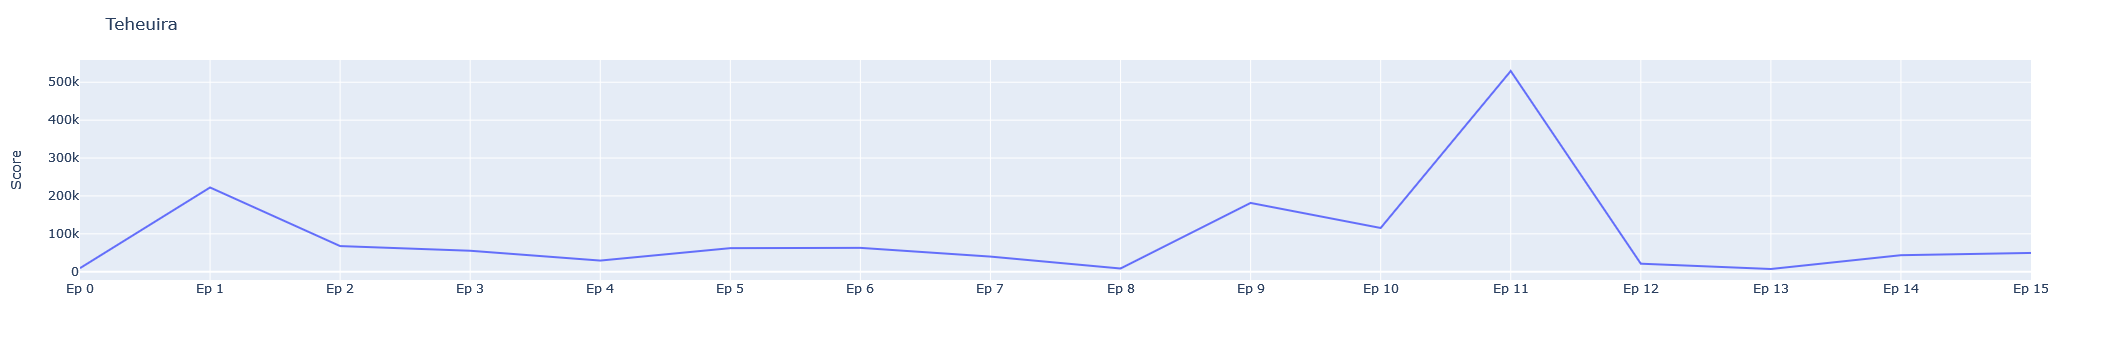

In [9]:
candidat = 'Teheuira'

fig = px.line(x= all_scores.columns, y =all_scores.loc[candidat])
fig.update_yaxes(title='Score')
fig.update_xaxes(title='')
fig.update_layout(title=candidat)

## Normalisation par épisode

In [10]:
# Pour un épisode

# all_scores = gen_all_scores(nom_candidats, 0)
# dfi.export(all_scores.style.highlight_max(color='lightgreen').highlight_min(color='#cd4f39'), 'a.png')

# tmp = round(100*(all_scores - all_scores.min())/(all_scores.max()-all_scores.min()),2)
# dfi.export(tmp.style.highlight_max(color='lightgreen').highlight_min(color='#cd4f39'), 'b.png')

In [11]:
all_scores = gen_all_scores(NOMS_CANDIDATS, 15)
norm_all_scores =100*(all_scores - all_scores.min())/(all_scores.max()-all_scores.min())

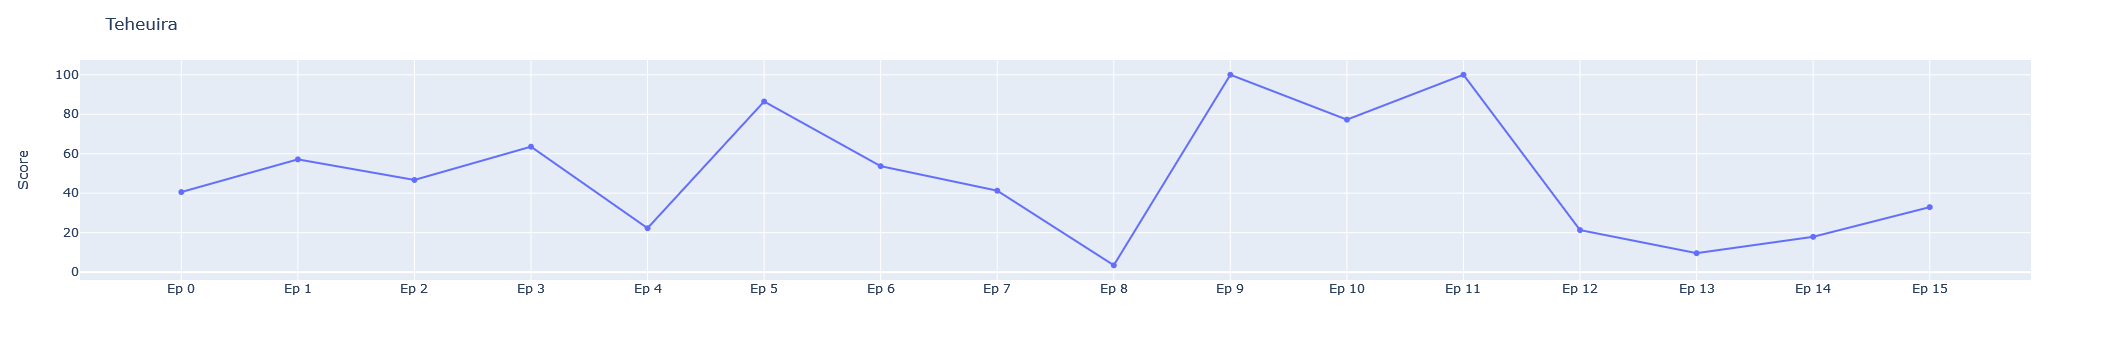

In [12]:
candidat = 'Teheuira'

fig = px.line(x= norm_all_scores.columns, y =norm_all_scores.loc[candidat], markers=True)
fig.update_yaxes(title='Score')
fig.update_xaxes(title='')
fig.update_layout(title=candidat)

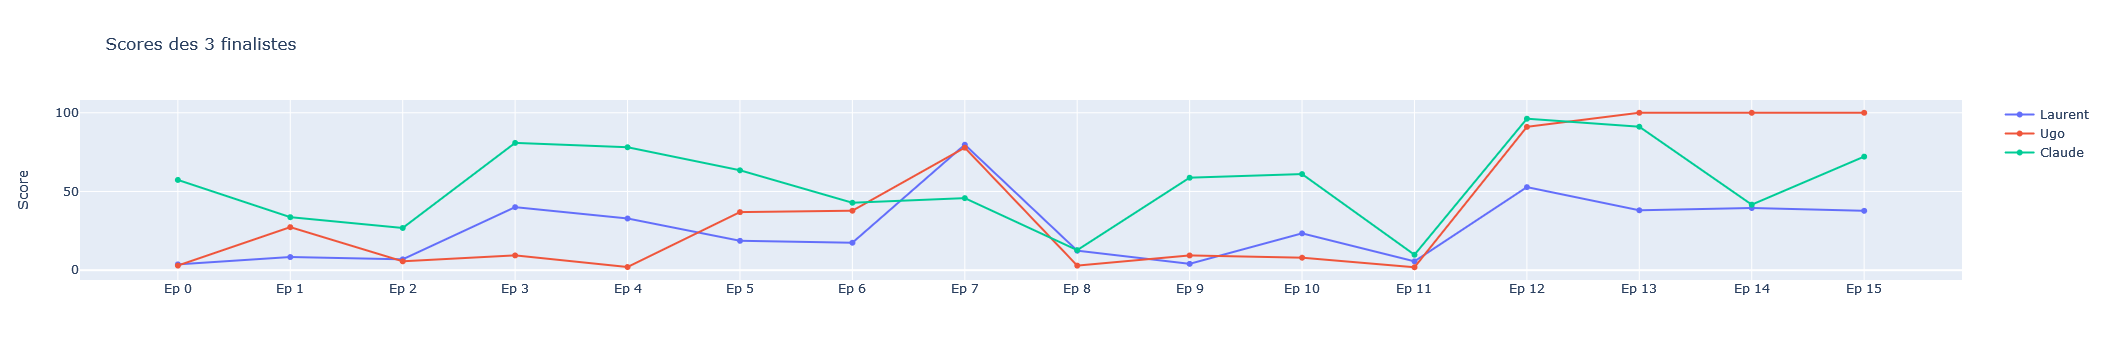

In [13]:
candidats = ['Laurent', 'Ugo', 'Claude']
x_val = norm_all_scores.columns

fig = go.Figure()
for nom in candidats:
    fig.add_trace(go.Scatter(x=x_val, y=norm_all_scores.loc[nom],
                             mode='lines+markers', name=nom))
fig.update_yaxes(title='Score')
fig.update_xaxes(title='')
fig.update_layout(title='Scores des 3 finalistes')


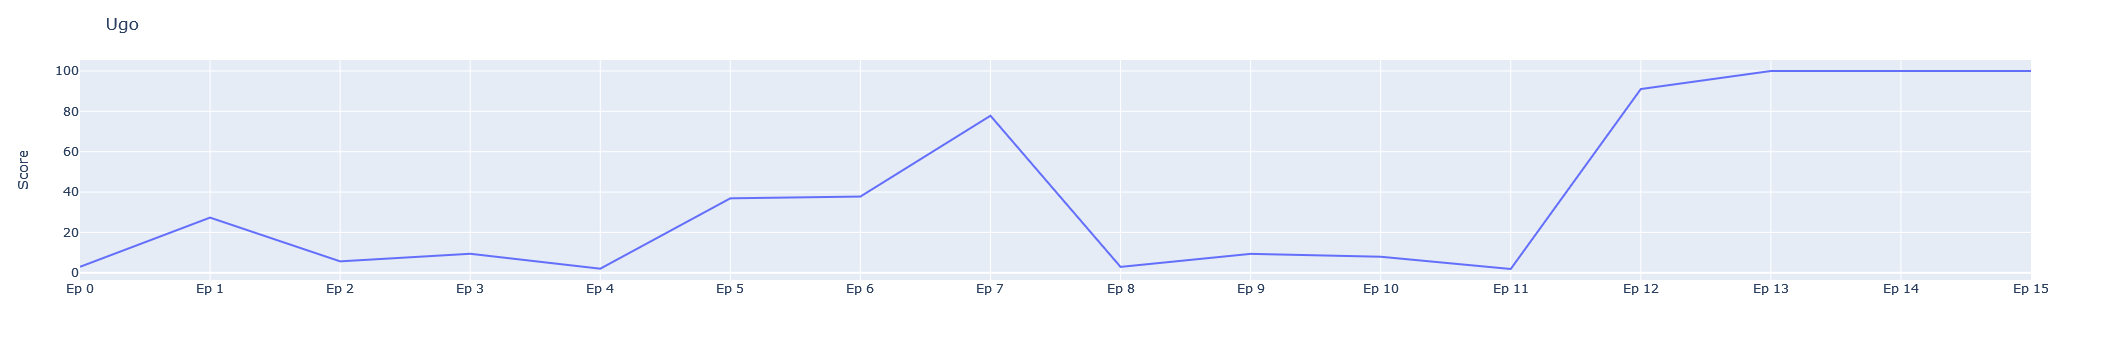

In [14]:
candidat = 'Ugo'

fig = px.line(x= norm_all_scores.columns, y =norm_all_scores.loc[candidat])
fig.update_yaxes(title='Score')
fig.update_xaxes(title='')
fig.update_layout(title=candidat)

# Analyse exploratoire

## Wordcloud

[Lemmatization Lefff](https://github.com/sammous/spacy-lefff])

In [15]:
# TODO: Trouver autre lemmatizer efficace pour corpus français

# @Language.factory('french_lemmatizer')
# def create_french_lemmatizer(nlp, name):
#     return LefffLemmatizer(after_melt=True, default=True)

# @Language.factory('melt_tagger')  
# def create_melt_tagger(nlp, name):
#     return POSTagger()

# nlp = spacy.load('fr_core_news_sm')
# nlp.add_pipe('melt_tagger', after='parser')
# nlp.add_pipe('french_lemmatizer', after='melt_tagger')

In [16]:
def plot_wordcloud_cv(nom_candidat, from_em, until_em, stop_words_fr, im_size=(2000,2000), random_state=0, colors_palette= None):
    w = all_infos(nom_candidat, from_em, until_em).reset_index() # Récupère tous les tweets sur un candidat de @from_em à @until_em
    
    w.content = w.content.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words_fr]))

    def multiply_content(row):
        multiply = (min(round(row.retweetCount/100), 20)) # On multiplie le tweet max par 20 fois
        return (row.content+' ')*(multiply+1)

    # w.content = w.apply(multiply_content, axis=1)    
    all_text = ' '.join(w.content)

    vectorizer = CountVectorizer(min_df=50, stop_words=stop_words_fr, ngram_range=(1,3))
    X = vectorizer.fit_transform(w.content)
    
    count = pd.DataFrame(data=X.toarray(), columns = vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
    frequency = (count/count.max()).to_dict()
    
    # WordCloud !
    img = cv2.imread('./wordcloud/Totem2.png')
    res = cv2.resize(img, dsize=im_size, interpolation=cv2.INTER_CUBIC)

    wc = WordCloud(stopwords=stop_words_fr, font_path='./wordcloud/Staatliches-Regular.ttf',
                   background_color=None, mask=res, contour_width=0, mode='RGBA',
                   max_font_size=256, min_word_length=3, max_words=2000, 
                   width=res.shape[1], height=res.shape[0],
                   random_state=random_state)
    
    wc.generate_from_frequencies(frequency)
    
    if colors_palette == None:
        plt.imshow(wc, interpolation="bilinear")
    else:
        def get_color_func(word, font_size, position, orientation, random_state=None,
            **kwargs):
            return get_single_color_func(random.choice(colors_palette))()
        
        plt.imshow(wc.recolor(color_func=get_color_func, random_state=3),
           interpolation="bilinear")
        
    plt.axis('off')
    plt.show()
    
    return wc, count  

In [17]:
# Suppression des stop words
stop_words_fr = set(stopwords.words('french'))
stop_words_fr.update(['koh', 'lanta', 'va', 'c\'est', 'trop', 'fait', 'comme',  'plus', 'vraiment', 'tellement', 'meme', 'qu\'il', 'faire', 'quand', 'etre', 'ça', 'là', 'si'])
stop_words_fr.update(['visage_qui_pleure_à_chaudes_larmes', 'visage_riant_aux_larmes', 'se_rouler_par_terre_de_rire'])   

stop_words_no_name = set(stopwords.words('french'))
stop_words_no_name.update(['koh', 'lanta', 'va', 'c\'est', 'trop', 'fait', 'comme',  'plus', 'vraiment', 'tellement', 'meme', 'qu\'il', 'faire', 'quand', 'etre', 'ça', 'là', 'si'])
stop_words_no_name.update(['visage_qui_pleure_à_chaudes_larmes', 'visage_riant_aux_larmes', 'se_rouler_par_terre_de_rire'])   

for nom in NOMS_CANDIDATS:
    surnoms, _ = surnoms_trouves(nom)
    stop_words_no_name.update(surnoms) 

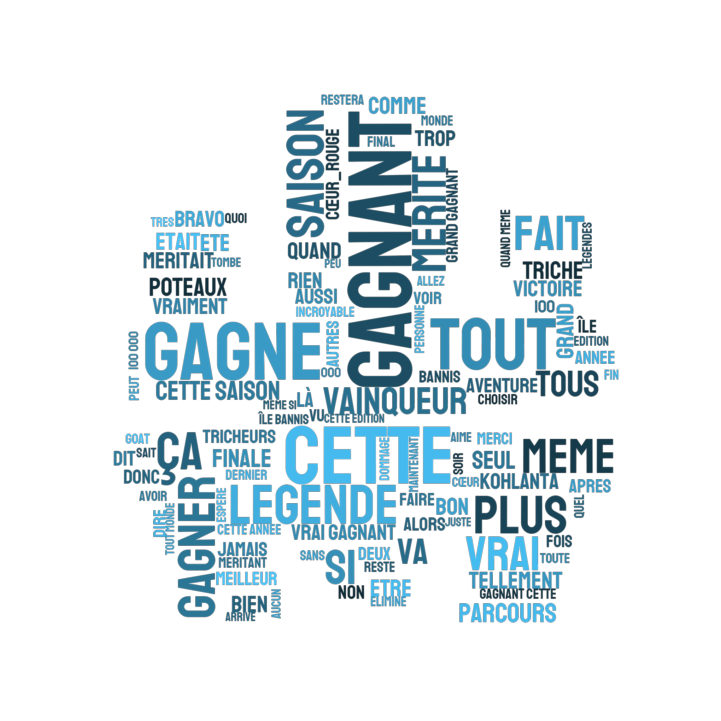

In [51]:
_, _ = plot_wordcloud_cv('Ugo', 15, 15, stop_words_no_name, random_state=2, colors_palette = ['#42B4E6'])

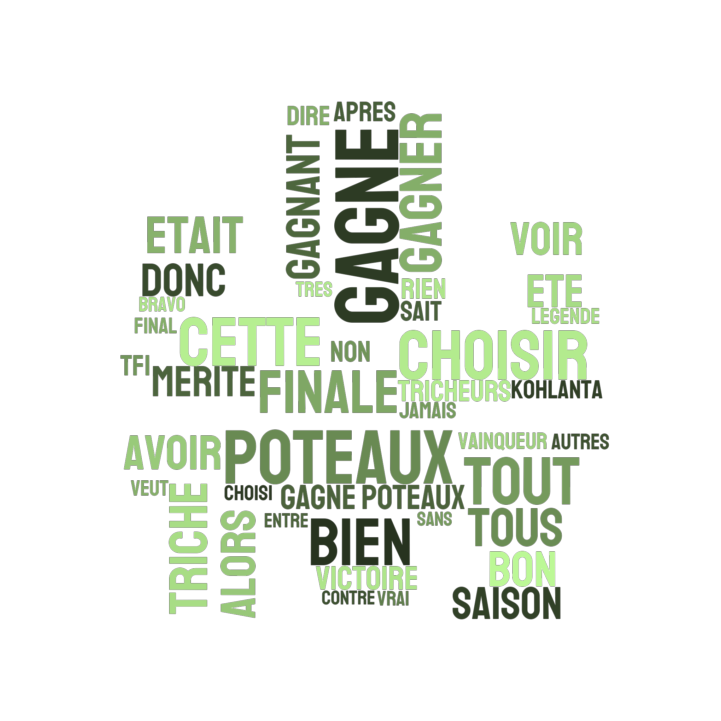

In [69]:
_, _ = plot_wordcloud_cv('Laurent', 15, 15, stop_words_no_name, random_state=2, colors_palette = ['#ABE188'])

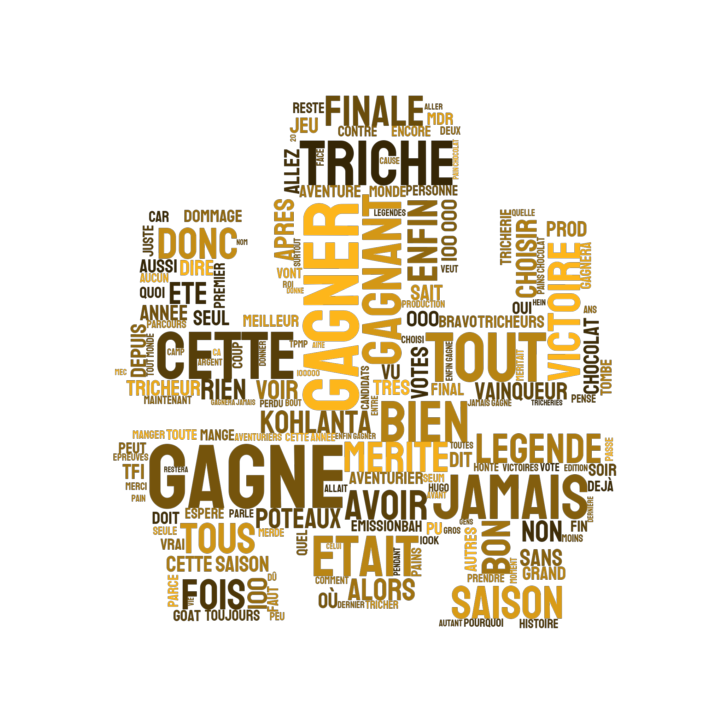

In [70]:
_, _ = plot_wordcloud_cv('Claude', 15, 15, stop_words_no_name, colors_palette = ['#FFB71B'])

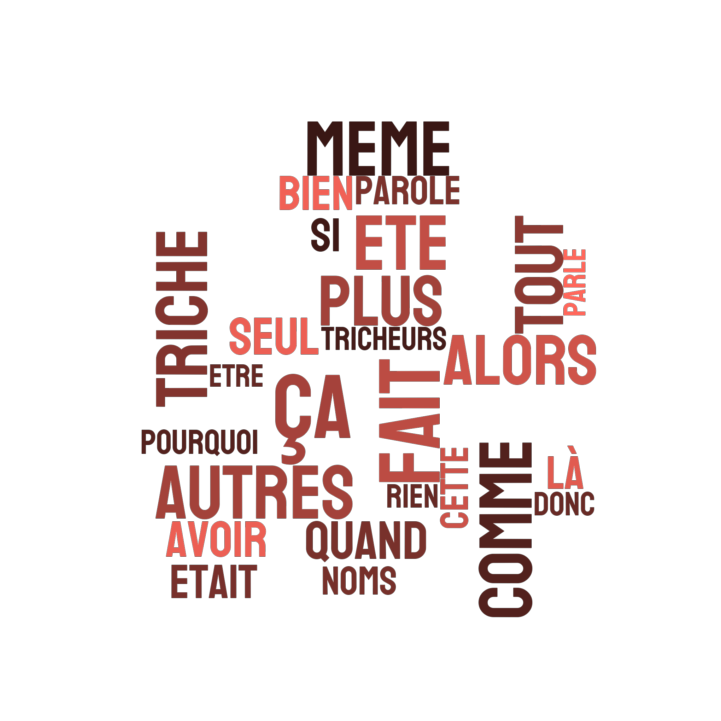

In [54]:
_, _ = plot_wordcloud_cv('Teheuira', 15, 15, stop_words_no_name, colors_palette = ['#E95E53'])

## Quel candidat a le plus souvent fait le + parler de lui ?

In [18]:
(norm_all_scores == 100).sum(axis=1).sort_values(ascending=False)

Coumba        5
Ugo           3
Sam           2
Teheuira      2
Loic          1
Clementine    1
Denis         1
Alexandra     1
Jade          0
Maxime        0
Laurent       0
Candice       0
Karima        0
Claude        0
Cindy         0
Namadia       0
Christelle    0
Patrick       0
Clemence      0
Phil          0
Alix          0
Freddy        0
dtype: int64

## Quel candidat a provoqué globalement le plus de réactions ?

In [19]:
all_scores.sum(axis=1).sort_values(ascending=False)

Teheuira      1506518
Sam           1154682
Claude        1154377
Coumba        1105263
Ugo            881810
Laurent        572659
Alexandra      546243
Loic           528742
Phil           517721
Denis          480071
Namadia        375210
Clementine     365249
Clemence       329274
Alix           317986
Karima         276288
Jade           247708
Freddy         217198
Cindy          132061
Christelle      99587
Patrick         87291
Candice         75064
Maxime          52777
dtype: int64

## Nombre de likes, tweets, retweets provoqués par émission par candidat

In [20]:
def get_all_reactions(nom, until_em, display=True):
    results= pd.DataFrame()
    for num in range(0,until_em+1):
        path = f'./data_jugement/em{num}/'
        df_all = get_all_tweets(NOMS_CANDIDATS, num, num) # Récupère tous les tweets de l'émission num
        df = pd.read_pickle(path + nom.lower() + '.pickle')
        tmp = pd.DataFrame([df.shape[0]/df_all.shape[0],
                            df.likeCount.sum()/df_all.likeCount.sum(),
                            df.retweetCount.sum()/df_all.retweetCount.sum()],
                           columns=[f'Episode {num}'], index=['nb_tweets', 'nb_retweets', 'nb_likes'])
        results = pd.concat([results, tmp], axis=1)
    fig = go.Figure(data=[
        go.Bar(name='nb_tweets', x=results.columns, y=results.loc['nb_tweets']*100),
        go.Bar(name='nb_retweets', x=results.columns, y=results.loc['nb_retweets']*100),
        go.Bar(name='nb_likes', x=results.columns, y=results.loc['nb_likes']*100)
    ])
    # Change the bar mode
    fig.update_layout(barmode='group')
    fig.update_xaxes(tickangle=90)
    fig.update_layout(title=nom)
    # fig.update_yaxes(type="log")
    if display:
        fig.show()
        
    return results, fig

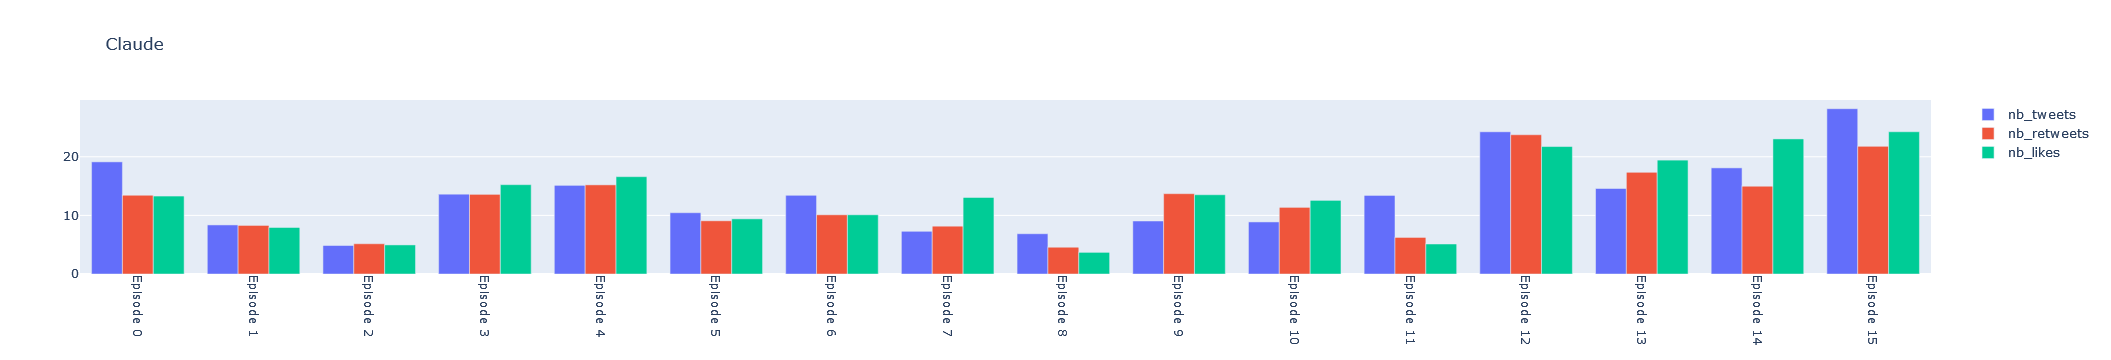

In [21]:
_, _ = get_all_reactions('Claude', 15)

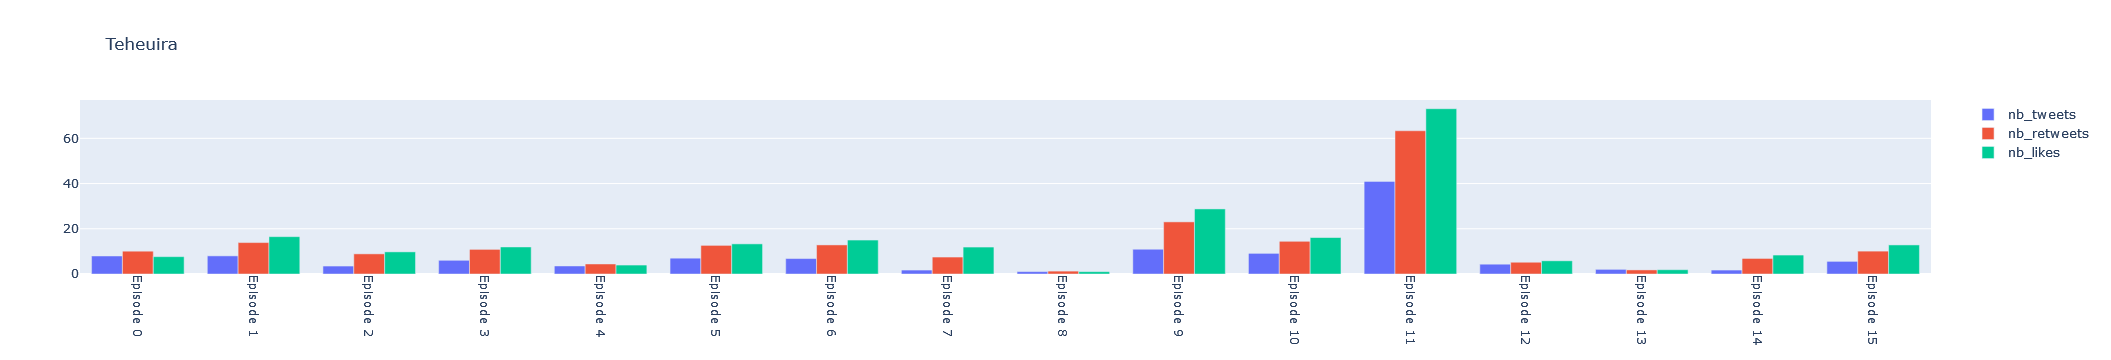

In [23]:
_, _ = get_all_reactions('Teheuira', 15)

# Bonus...

## Info complète sur candidat

In [198]:
def info_candidat(nom_candidat, until_em, stopwords):
    '''
    Retourne différentes infos sur un candidat:
    - Son wordcloud associé
    - Les 3 tweets le concernant les plus populaires
    - Les 5 mots les plus utilisés quand on parle de lui
    - Répartition des tweets dans le temps
    - Nombre de tweets / Nombre de likes / Nombre de retweets
    '''
    
    df = all_infos(nom_candidat, until_em)
    print(f'Total tweets: {df.shape[0]},\nTotal likes: {df.likeCount.sum()},\nTotal retweets: {df.retweetCount.sum()}')
    

    
    print('Top 3 des tweets les plus retweetés')
    display(df.sort_values(by='retweetCount', ascending=False).head(3))
    
    wc, words_count = plot_wordcloud_cv(nom_candidat, 14, stopwords)
    print('Mots les plus utilisés:')
    display(words_count.head(10))
